# Project 2
## Step 1: Explore data

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
#Importing packages 
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [257]:
sns.set(style="whitegrid", color_codes=True)


##### Write a brief description of your data, data dictionary, and any interesting observations you've made thus far. 

In [2]:
#read the data from csv and assign it to a dataframe
bd_original = pd.read_csv("../assets/billboard.csv")

In [3]:
#Wanted to verify what is created
type(bd_original)

pandas.core.frame.DataFrame

In [4]:
#checking how many rows and columns are here.
bd_original.shape
#317 rows, 83 columns 

(317, 83)

In [5]:
#bd_original.info()


#getting some more info about the DataFrame
##Initial thoughts on what I need to clean: 
#change title artist.inverted to artist
#change title date.entered to date_entered
#change title date.peaked to date_peaked
#change date_entered and date_peaked types to datetime
#strip 'x', 'st' from week titles
#replace '.' with '_' in week titles


In [6]:
#using describe to get more detailed info on the data and to understand how it differs from info()
#Got 'RuntimeWarning: Invalid value encountered in percentile' error when running describe. I think it has to do with 
#some of the columns being all nan

bd_original.describe(include='all')

##Initial notes and thoughts on what the numbers might show us from describe: 
#top artist: Jay-Z
#top track: Where I Wanna Be
#top genre: Rock
#unique: 228 out of 317 artists
#unique: 68 out of 317 date_entered
#unique: 53 out of 317 date_peaked
#avg rank on week 1: 79.958991
#min rank on week 1: 15.000000
#max rank on week 1: 100.000000


//anaconda/envs/py27/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317,317,317,317,317,317,317.000000,312.000000,307.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,228,316,126,10,68,53,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jay-Z,Where I Wanna Be,3:50,Rock,2000-01-29,2000-12-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,2,9,137,11,17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,79.958991,71.173077,65.045603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14.686865,18.200443,20.752302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,8.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,81.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Clean data

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that are too long, and check for missing values (replace them and explain rationale if it makes sense).

In [7]:
#drop entire column if all data is NaN in column
##params:
#axis='1' drops the entire column instead of dropping an entire row
#how='all' only drops columns where all the rows for that column are nan

bd_nan_dropped = bd_original.dropna(how='all', axis=1)

#verifying shape to make sure number of columns dropped, and rows are uneffected
#new rows = 317
#new columns = 72
bd_nan_dropped.shape

(317, 72)

In [8]:
#Using a function to rename weeks titles
def replace_weeks(list_in):
    name = ['year', 'artist', 'track', 'track_length', 'genre', 'date_entered', 'date_peaked']
    for index, i in enumerate(list_in):
        i = 'week_0{}'.format(index + 1)
        name.append(i)
    return name

bd_weeks_only = bd_nan_dropped.iloc[:, 7:]
bd_weeks_only.shape

#calling replace_weeks function and returning list of new column names to cols variable
cols = replace_weeks(bd_weeks_only.columns)

bd_nan_dropped.columns = cols

In [9]:
bd_weeks_only = bd_nan_dropped.iloc[:, 7:]
bd_weeks_only.shape

(317, 65)

In [10]:
#calling replace_weeks function and returning list of new column names to cols variable
cols = replace_weeks(bd_weeks_only.columns)

In [11]:
bd_nan_dropped.columns = cols

In [160]:
#dropping the year column to clean table some more since i'm not sure how it is usefull for my problem statement.
bd_year_dropped = bd_nan_dropped.drop('year', axis=1)

In [161]:
bd_year_dropped.shape

(317, 71)

In [162]:
#change date formats
bd_year_dropped['date_entered'] = pd.to_datetime(bd_year_dropped['date_entered'])
bd_year_dropped['date_peaked'] = pd.to_datetime(bd_year_dropped['date_peaked'])

In [163]:
bd_year_dropped.head()

#What I've completed so far. Just creating a checkpoint for myself to brainstorm next steps:
#change title artist.inverted to artist - DONE
#change title date.entered to date_entered - DONE
#change title date.peaked to date_peaked - DONE
#change date_entered and date_peaked types to datetime - DONE
#strip 'x', 'st' from week titles - DONE
#replace '.' with '_' in week titles - DONE

,artist,track,track_length,genre,date_entered,date_peaked,week_01,week_02,week_03,week_04,...,week_056,week_057,week_058,week_059,week_060,week_061,week_062,week_063,week_064,week_065
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#WHAT NEXT?
##From this current data, what new data can I extrapulate and add as a new column to the cleaned dataset?
#How many weeks did each track stay on the chart?
#How long did it take each track to reach it's peak?

In [165]:
#How many weeks did each track stay on the chart?
#Creating new column 'weeks_on_chart' to show how long each track was on the chart
bd_year_dropped['weeks_on_chart'] = bd_year_dropped.ix[:,6:].notnull().sum(axis=1)

In [166]:
bd_year_dropped['days_to_peak'] = bd_year_dropped['date_peaked'] - bd_year_dropped['date_entered']

In [167]:
#bd_year_dropped.describe(include='all')
bd_year_dropped.head()

,artist,track,track_length,genre,date_entered,date_peaked,week_01,week_02,week_03,week_04,...,week_058,week_059,week_060,week_061,week_062,week_063,week_064,week_065,weeks_on_chart,days_to_peak
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,56 days
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,56 days
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,98 days
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,35 days
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,70 days


In [20]:
bd_year_dropped['week_01'] = bd_year_dropped['week_01'].astype(float)

In [63]:
bd_original_cleaned = bd_year_dropped.iloc[:,:-2]

In [64]:
bd_original_cleaned['artist'] = bd_original_cleaned['artist'].astype('category')
bd_original_cleaned['track'] = bd_original_cleaned['track'].astype('category')
bd_original_cleaned['genre'] = bd_original_cleaned['genre'].astype('category')

In [46]:
# bd_original_cleaned['track_length'] = pd.to_datetime(bd_original_cleaned['track_length'])

In [68]:
bd_original_cleaned['track_length'] = bd_original_cleaned['track_length'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [188]:
bd_melt3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 3 columns):
track       634 non-null object
variable    634 non-null object
value       634 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 14.9+ KB


In [190]:
bd_melt3.tail()

,track,variable,value
629,Cherchez LaGhost,date_peaked,2000-08-05
630,Freakin' It,date_peaked,2000-02-12
631,Kernkraft 400,date_peaked,2000-09-02
632,Got Beef,date_peaked,2000-07-01
633,Toca's Miracle,date_peaked,2000-10-28


In [197]:
bd_track_counts3 = pd.pivot_table(bd_melt3, index='track', aggfunc=bd_melt3[bd_melt3['variable'] == 'date_peaked'].value - bd_melt3[bd_melt3['variable'] == 'date_entered'].value)

ValueError: No objects to concatenate

In [119]:
bd_melt = pd.melt(bd_year_dropped, id_vars=['track'], value_vars=list(bd_year_dropped.iloc[:, 6:-2]), var_name='Week', value_name='Ranking')

In [120]:
bd_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20605 entries, 0 to 20604
Data columns (total 3 columns):
track      20605 non-null object
Week       20605 non-null object
Ranking    5307 non-null float64
dtypes: float64(1), object(2)
memory usage: 483.0+ KB


In [121]:
bd_melt = bd_melt.dropna()

In [123]:
bd_melt.head()

,track,Week,Ranking
0,Independent Women Part I,week_01,78.0
1,"Maria, Maria",week_01,15.0
2,I Knew I Loved You,week_01,71.0
3,Music,week_01,41.0
4,Come On Over Baby (All I Want Is You),week_01,57.0


In [125]:
bd_track_counts = pd.pivot_table(bd_melt, index='track', aggfunc='mean')

In [126]:
bd_track_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, (Hot S**t) Country Grammar to www.memory
Data columns (total 1 columns):
Ranking    316 non-null float64
dtypes: float64(1)
memory usage: 4.9+ KB


In [147]:
bd_track_counts.head()

,Ranking
track,
(Hot S**t) Country Grammar,30.882353
3 Little Words,94.444444
911,60.000000
A Country Boy Can Survive,86.666667
A Little Gasoline,89.833333


In [139]:
#bd_track_counts.plot(kind='bar', use_index=True)

In [140]:
bd_melt2 = pd.melt(bd_original_cleaned, id_vars=['track'], value_vars=list(bd_original_cleaned.iloc[:, 6:-2]), var_name='Week', value_name='Ranking')

In [141]:
bd_melt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19971 entries, 0 to 19970
Data columns (total 3 columns):
track      19971 non-null object
Week       19971 non-null object
Ranking    5304 non-null float64
dtypes: float64(1), object(2)
memory usage: 468.1+ KB


In [142]:
bd_melt2 = bd_melt2.dropna()

In [143]:
bd_melt2.head()

,track,Week,Ranking
0,Independent Women Part I,week_01,78.0
1,"Maria, Maria",week_01,15.0
2,I Knew I Loved You,week_01,71.0
3,Music,week_01,41.0
4,Come On Over Baby (All I Want Is You),week_01,57.0


In [144]:
bd_track_counts1 = pd.pivot_table(bd_melt2, index='track', aggfunc='mean')

In [145]:
bd_track_counts1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, (Hot S**t) Country Grammar to www.memory
Data columns (total 1 columns):
Ranking    316 non-null float64
dtypes: float64(1)
memory usage: 4.9+ KB


In [146]:
bd_track_counts1.head()

,Ranking
track,
(Hot S**t) Country Grammar,30.882353
3 Little Words,94.444444
911,60.000000
A Country Boy Can Survive,86.666667
A Little Gasoline,89.833333


In [148]:
bd_track_counts1['Ranking'] = bd_track_counts1['Ranking'].astype(int)

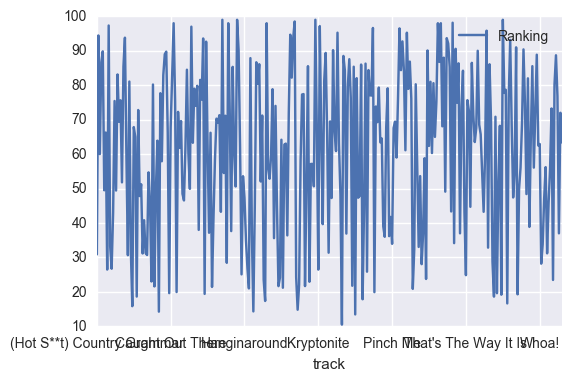

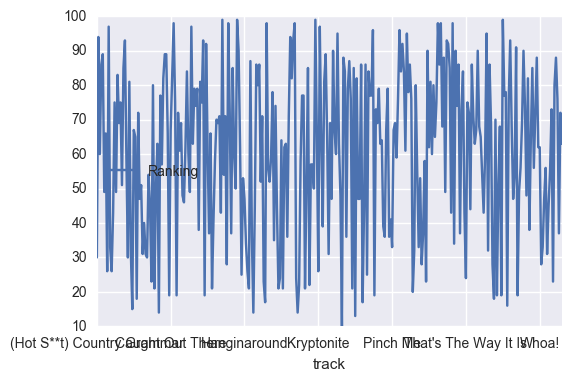

In [151]:
bd_track_counts.plot()

In [ ]:
bd_melt_g = pd.melt(bd_year_dropped, id_vars=['track'], value_vars=list(bd_year_dropped.iloc[:, 6:-2]), var_name='Week', value_name='Ranking')

In [134]:
bd_melt_genre = pd.melt(bd_original_cleaned, id_vars=['genre', 'artist', 'track'], value_vars=list(bd_original_cleaned.iloc[:, 6:-2]), var_name='Week', value_name='Ranking')

In [231]:
bd_genre_counts = pd.pivot_table(bd_melt_genre, index='genre', aggfunc='count')

In [232]:
bd_genre_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Country to Rock
Data columns (total 4 columns):
Ranking    10 non-null int64
Week       10 non-null int64
artist     10 non-null int64
track      10 non-null int64
dtypes: int64(4)
memory usage: 400.0+ bytes


In [236]:
bd_genre_counts.head()

,Ranking,Week,artist,track
genre,,,,
Country,1199,4662,4662,4662
Electronica,72,252,252,252
Gospel,20,63,63,63
Jazz,5,63,63,63
Latin,173,567,567,567


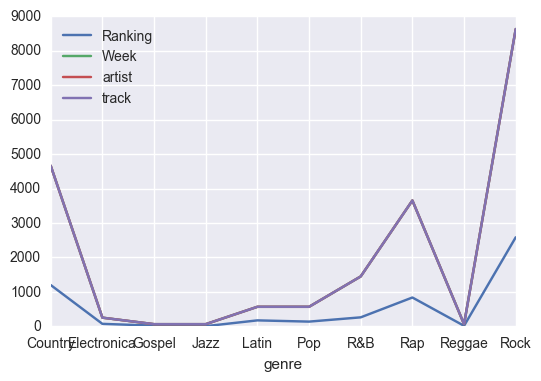

In [234]:
bd_genre_counts.plot()
#plt.gca().invert_yaxis()

In [ ]:
bd_melt_genre = pd.melt(bd_original_cleaned, id_vars=['genre', 'artist', 'track'], value_vars=list(bd_original_cleaned.iloc[:, 6:-2]), var_name='Week', value_name='Ranking')

In [ ]:
# artist                     object
# track                      object
# track_length               object
# genre                      object

In [ ]:
bd_year_dropped.dtypes

In [322]:
bd_gpv = pd.pivot_table(bd_year_dropped, index='track')

In [320]:
bd_gpv

""
track
(Hot S**t) Country Grammar
3 Little Words
911
A Country Boy Can Survive
A Little Gasoline
A Puro Dolor (Purest Of Pain)
Aaron's Party (Come Get It)
Absolutely (Story Of A Girl)
All Good?


In [305]:
bd_melt.columns

Index([u'track', u'Week', u'Ranking'], dtype='object')

In [ ]:
bd_track_counts.plot(x=bd_track_counts['track'], y=bd_track_counts['weeks_on_chart'])
plt.gca().invert_xaxis()

In [307]:
bd_melt.index = bd_melt['track']

In [312]:
del bd_melt['track']

In [313]:
bd_melt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5307 entries, Independent Women Part I to Higher
Data columns (total 2 columns):
Week       5307 non-null object
Ranking    5307 non-null float64
dtypes: float64(1), object(1)
memory usage: 124.4+ KB


In [315]:
bd_melt.plot(x=bd_melt['Week'], y=bd_melt['Ranking'])
#plt.gca().invert_xaxis()

KeyError: '[ 78.  15.  71. ...,  50.  50.  49.] not in index'

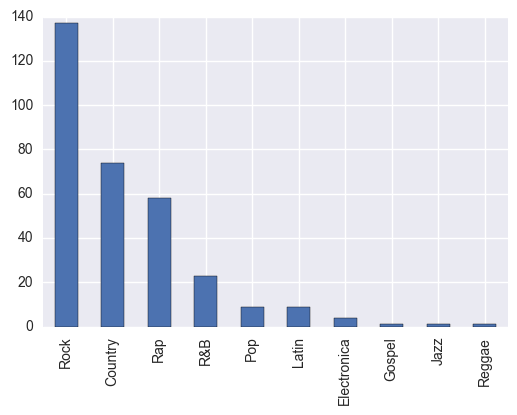

In [239]:
bd_year_dropped.genre.value_counts().plot(kind='bar')

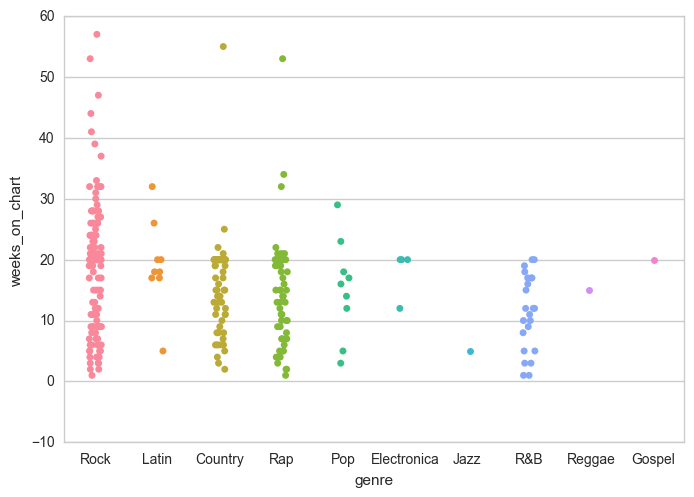

In [261]:
sns.stripplot(x="genre", y="weeks_on_chart", data=bd_year_dropped, jitter=True)

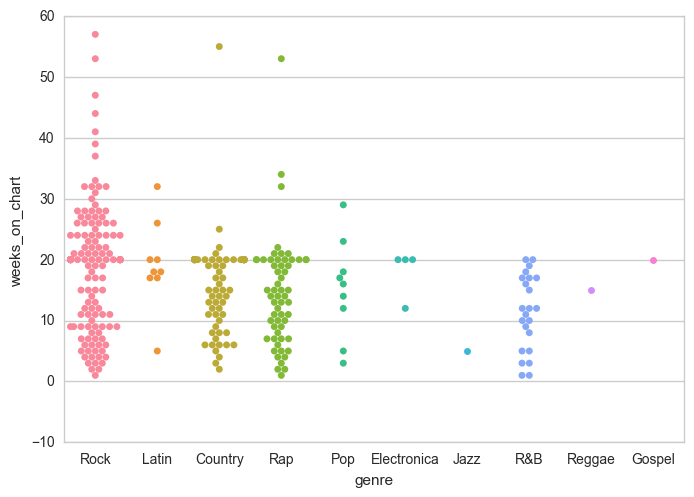

In [262]:
sns.swarmplot(x="genre", y="weeks_on_chart", data=bd_year_dropped)

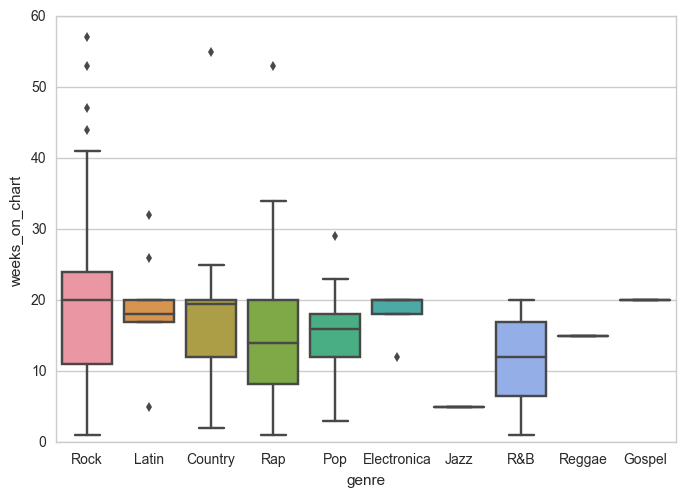

In [263]:
sns.boxplot(x="genre", y="weeks_on_chart", data=bd_year_dropped)

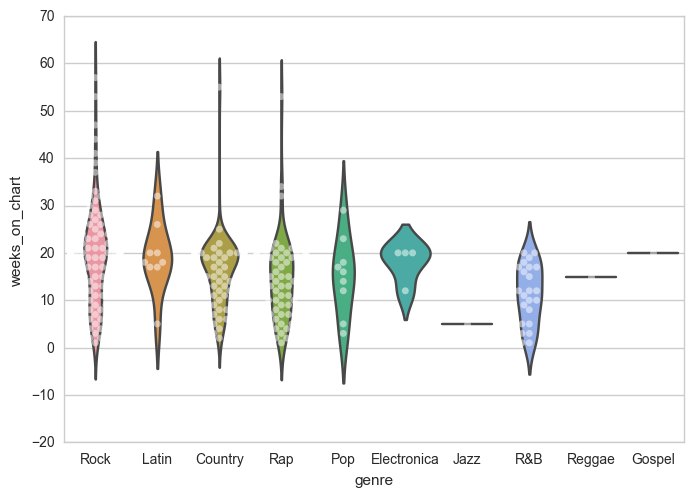

In [269]:
sns.violinplot(x="genre", y="weeks_on_chart", data=bd_year_dropped, inner=None)
sns.swarmplot(x="genre", y="weeks_on_chart", data=bd_year_dropped, color='w', alpha=.5)

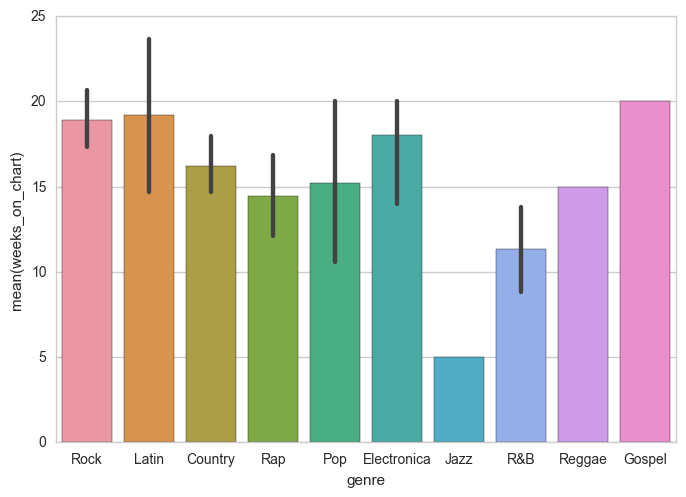

In [291]:
sns.barplot(x="genre", y="weeks_on_chart", data=bd_year_dropped)

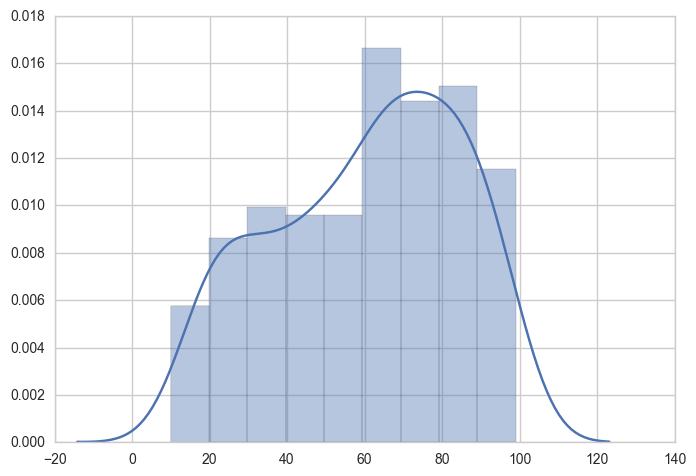

In [286]:
sns.distplot(bd_track_counts1)

TypeError: unsupported operand type(s) for /: 'str' and 'float'

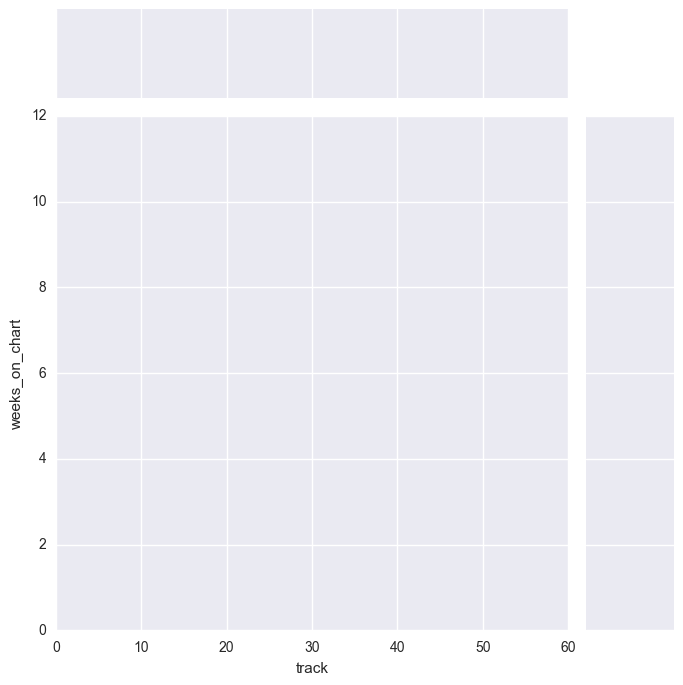

In [293]:
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("track", "weeks_on_chart", data=bd_year_dropped, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)

In [287]:
sns.pointplot(x='genre', y='days_to_peak', data=bd_year_dropped)

ValueError: Could not convert object to NumPy timedelta

In [ ]:
sns.pointplot(x="date_enterd", y="weeks_on_chart", hue="genre", data=bd_year_dropped,
              palette={"genre": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

## Step 3: Visualize your data.

##### Using BOTH a Tableau Dashboard and python, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement that includes risks and assumptions for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

- Guide: http://www.ceptara.com/blog/how-to-write-problem-statement
- Kaggle example: https://www.kaggle.com/c/inria-bci-challenge
- Kaggle example: https://www.kaggle.com/c/axa-driver-telematics-analysis

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a site and post your process and results. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers.

### BONUS: LinkedIn has recognized you as a DS thought leader and asked you to pen a white paper (~500 words) on 'Best Practices for Clean Data'. This will be an opinion piece read by a wide (including semi-technical) audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: Look for online resources (articles, blogs, papers, youtube, podcasts, reddit) that will help you understand the challenges and implications of dealing with big data and missing data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

Score | /24
----- | ------
Identify: Problem Statement / Hypothesis	| 		
Identify: Risks & Assumptions				| 
Acquire: Import Data Using Pandas			| 
Parse: Perform EDA Using Pandas				| 
Viz: Tableau Dashboard and Plots			| 
Mine: Determine Correlations				|
Refine: Evaluate Findings				    |
Present: Describe Results in Blog Post		|
Bonus! Present: Write a short White Paper	| /5